<a href="https://colab.research.google.com/github/krisdsutton/data205/blob/main/Data_205_EDA_MC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 205 Project Montgomery County Crash Data

### Kris Sutton

###November 3, 2021


Source: dataMontgomery

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf



Dataset information:
provides general information about all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police.

Number of observations: 74,568

Number of variables: 44

Each row is a "Collision"

Reasearch Questions:

In what areas of the county are there more accidents and more severe accidents?

In what cities in Maryland are there more accidents and more severe accidents?

Is there a seasonal trend in the number and severity of accidents?



In [ ]:
#import  pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib as mpl 
#import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn
import seaborn as sns
#import ticker
import matplotlib.ticker as mtick
#import folium
import folium
plt.style.use('classic')

from pandas_profiling import ProfileReport
from IPython.display import Image

In [ ]:
# read MC crash dataset

mc_crash = pd.read_csv('https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv')
mc_crash_clean = pd.read_csv('https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv')
mc_crash.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,"IN FRONT OF 6630 EAMES WAY BETHESDA, MD.",NaN,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER,NaN,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,EJ78460055,200017938,Gaithersburg Police Depar,Property Damage Crash,05/02/2020 02:16:00 PM,Yes,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,949 CLOPPER RD PARKING LOT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,PARKED VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,09/15/2020 03:33:00 PM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT @ 9827 BROOKRIDGE CT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,OTHER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.188862,-77.202455,"(39.18886167, -77.202455)"
3,HA23890011,20002466,Maryland-National Capital,Property Damage Crash,10/14/2020 08:40:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,GRAVEL PARKING LOT AT POPE FARM NURSERY,NaN,NaN,UNKNOWN,NaN,NaN,NaN,DAYLIGHT,NaN,NaN,NaN,UNITS SEPARATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,03/03/2020 09:19:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT OF 16705 CRABBS BRANCH WAY,NaN,NaN,DRIVER,SINGLE VEHICLE,CLOUDY,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER OBJECT,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,39.129216,-77.167342,"(39.1292155, -77.16734233)"


In [ ]:
#getting information about number of cloumn and rows, variable types
mc_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74778 entries, 0 to 74777
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Report Number                 74778 non-null  object 
 1   Local Case Number             74778 non-null  object 
 2   Agency Name                   74778 non-null  object 
 3   ACRS Report Type              74778 non-null  object 
 4   Crash Date/Time               74778 non-null  object 
 5   Hit/Run                       74776 non-null  object 
 6   Route Type                    64809 non-null  object 
 7   Mile Point                    65244 non-null  float64
 8   Mile Point Direction          64825 non-null  object 
 9   Lane Direction                65255 non-null  object 
 10  Lane Number                   74778 non-null  int64  
 11  Lane Type                     7235 non-null   object 
 12  Number of Lanes               74778 non-null  int64  
 13  D

##Data Wrangling

In [ ]:
#checking for N/A
mc_crash.isnull()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,True,True,True,False,True,False,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,False,False,True,False,True,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,False,True,True,False,True,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,True,False,False,False,True,False,True,True,True,False,True,False,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74773,False,False,False,False,False,False,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False
74774,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False
74775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
74776,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Counting "n/a"s in dataset
mc_crash.isna().sum().sort_values(ascending = False)

Non-Motorist Substance Abuse    71552
Related Non-Motorist            70712
Lane Type                       67543
Municipality                    66823
Off-Road Description            65255
Fixed Oject Struck              59024
Second Harmful Event            55970
Intersection Area               54057
Intersection Type               38012
Junction                        19899
Traffic Control                 13240
Road Condition                  12268
Driver Substance Abuse          11977
Surface Condition               11376
Road Division                   10486
Road Grade                      10029
Cross-Street Type                9980
Route Type                       9969
Mile Point Direction             9953
Road Alignment                   9855
Direction                        9534
Mile Point                       9534
Cross-Street Name                9529
Road Name                        9524
Distance Unit                    9524
Lane Direction                   9523
Distance    

Based on high number of n/a's in some columns, I will ignore columns with more than 20,000.

In [ ]:
#removing columns with high number of n/a's:  > 20,000 
mc_crash1 = mc_crash[['Junction' , 'Road Condition' , 'Driver Substance Abuse' , 'Surface Condition' , 'Road Division' , 'Road Grade' , 'Route Type' , 'Mile Point Direction' , 'Road Alignment' , 'Direction' , 'Mile Point' , 'Cross-Street Name' , 'Road Name' , 'Distance Unit' , 'Lane Direction' , 'Distance' , 'Weather' , 'Light' , 'First Harmful Event' , 'Collision Type' , 'Hit/Run' , 'Crash Date/Time' , 'Local Case Number' , 'ACRS Report Type' , 'Agency Name' , 'Location' , 'Number of Lanes' , 'NonTraffic' , 'Longitude' , 'At Fault' , 'Latitude' , 'Report Number']]
mc_crash1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74778 entries, 0 to 74777
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Junction                54879 non-null  object 
 1   Road Condition          62510 non-null  object 
 2   Driver Substance Abuse  62801 non-null  object 
 3   Surface Condition       63402 non-null  object 
 4   Road Division           64292 non-null  object 
 5   Road Grade              64749 non-null  object 
 6   Route Type              64809 non-null  object 
 7   Mile Point Direction    64825 non-null  object 
 8   Road Alignment          64923 non-null  object 
 9   Direction               65244 non-null  object 
 10  Mile Point              65244 non-null  float64
 11  Cross-Street Name       65249 non-null  object 
 12  Road Name               65254 non-null  object 
 13  Distance Unit           65254 non-null  object 
 14  Lane Direction          65255 non-null

In [ ]:
# removing n/a values
#mc_crash2 = mc_crash1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#mc_crash2.head()

##Visualizations

In [ ]:
#broken box plot using mile marker and lane direction
##ax = sns.catplot(x="Mile Point Direction", y='Mile Point', data=mc_crash1, palette="Set1", kind="boxen")
##plt.show()

In [ ]:
##box plot using mile marker and type of crashes
#ax = sns.boxplot(x="ACRS Report Type", y='Mile Point', data=mc_crash1, palette="Set2")
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
#plt.show()

In [ ]:
#graphing ACRS report type by frequency
acrs_type = mc_crash1["ACRS Report Type"].value_counts()
acrs_type

Property Damage Crash    48338
Injury Crash             26225
Fatal Crash                215
Name: ACRS Report Type, dtype: int64

In [ ]:
c = 48338 + 26225 + 215
d = 215 / c
d

0.002875177191152478

In [ ]:
c

74778

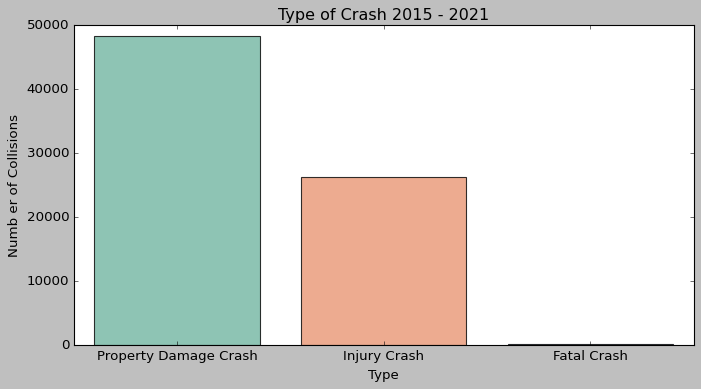

In [ ]:
acrs_type = acrs_type[:5,]
plt.figure(figsize=(10,5))
sns.barplot(x=acrs_type.index, y=acrs_type.values, palette="Set2", alpha=0.8)
plt.title('Type of Crash 2015 - 2021')
plt.ylabel('Numb er of Collisions', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

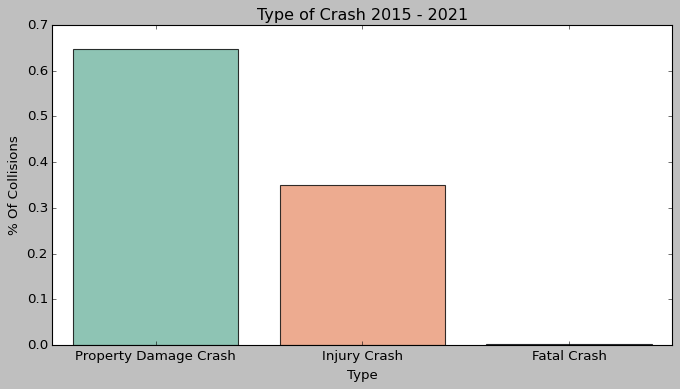

In [ ]:
#graphing ACRS report type by percentage
acrs_type = mc_crash1["ACRS Report Type"].value_counts(normalize=True)
acrs_type = acrs_type[:5,]
plt.figure(figsize=(10,5))
sns.barplot(x=acrs_type.index, y=acrs_type.values, palette="Set2", alpha=0.8)
plt.title('Type of Crash 2015 - 2021')
plt.ylabel('% Of Collisions', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

In [ ]:
# cleaning values in 'Collision Type' for aesthics
mc_crash1['Collision Type'] = mc_crash1['Collision Type'] .str.capitalize()
mc_crash1['Collision Type'] = mc_crash1['Collision Type'].replace(to_replace = 'Same dir rear end',
                 value ='Same direction rear end')

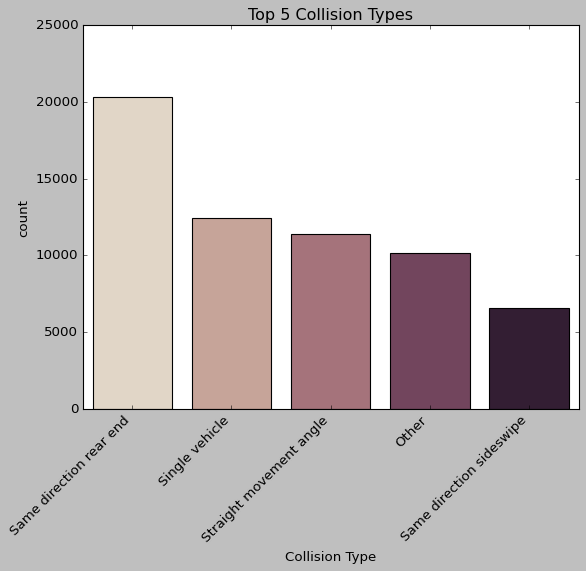

In [ ]:
#bar graph using count and type of collision
coll_count = sns.countplot(x='Collision Type',data=mc_crash1, palette="ch:.25",order=pd.value_counts(mc_crash1['Collision Type']).iloc[:5 ].index)
coll_count.set_xticklabels(coll_count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Top 5 Collision Types')
plt.show()

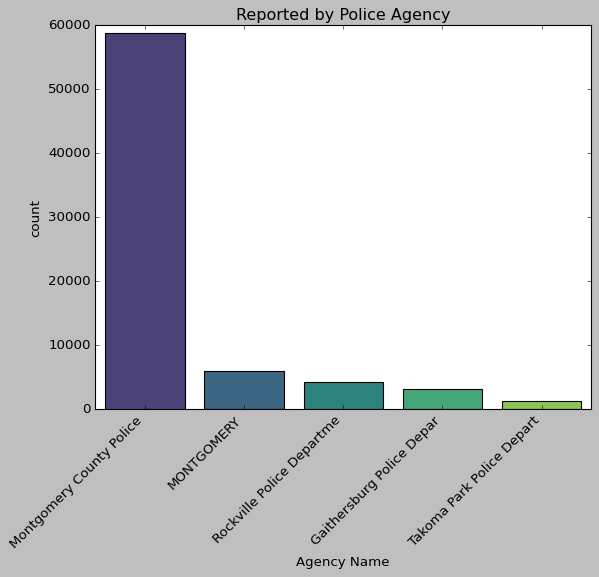

In [ ]:
#bar graph: using count which agencies report the most crashes
ag_count = sns.countplot(x='Agency Name',data=mc_crash1, palette="viridis",order=pd.value_counts(mc_crash1['Agency Name']).iloc[:5 ].index)
ag_count.set_xticklabels(ag_count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Reported by Police Agency')
plt.show()

In [ ]:
#number of collisions that are hit & run and not 
mc_crash1['Hit/Run'].value_counts()

No     61554
Yes    13222
Name: Hit/Run, dtype: int64

In [ ]:
#percentage of collisions that are hit & run and not 
mc_crash1['Hit/Run'].value_counts(normalize=True)


No     0.823179
Yes    0.176821
Name: Hit/Run, dtype: float64

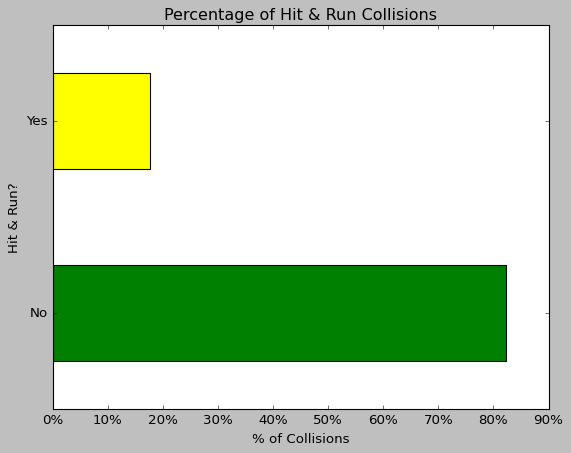

In [ ]:
#graphing above percentages
hit_run = mc_crash1['Hit/Run'].value_counts(normalize=True).plot(kind='barh', color=['green','yellow'])
hit_run.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Percentage of Hit & Run Collisions')
plt.ylabel('Hit & Run?', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()

In [ ]:
#number of collisions by light of day 
mc_crash1['Light'].value_counts()

DAYLIGHT                    48914
DARK LIGHTS ON              17764
DARK NO LIGHTS               2705
DUSK                         1711
DAWN                         1520
DARK -- UNKNOWN LIGHTING      826
UNKNOWN                       541
OTHER                         173
Name: Light, dtype: int64

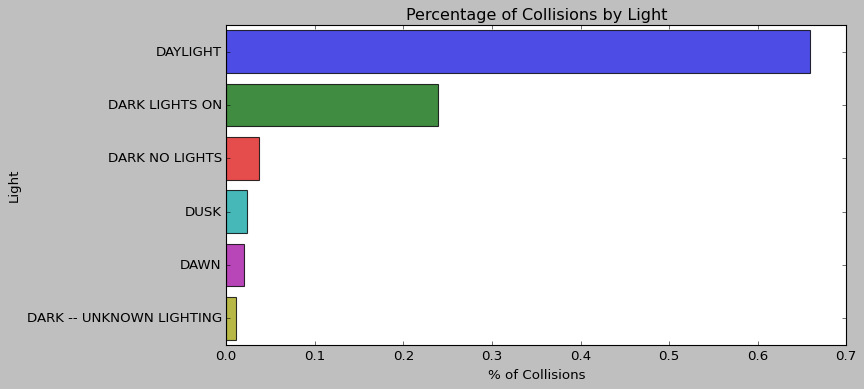

In [ ]:
#light = mc_crash2['Light'].value_counts(normalize=True).plot(kind='pie')

light = mc_crash1['Light'].value_counts(normalize=True)
light = light[:6,]
plt.figure(figsize=(10,5))
sns.barplot(x=light.values, y=light.index, alpha=0.8)
plt.title('Percentage of Collisions by Light')
plt.ylabel('Light', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()



In [ ]:
#weather breakdown of crashes
mc_crash1['Weather'].value_counts(normalize=True)

CLEAR                       0.722226
RAINING                     0.133576
CLOUDY                      0.111664
SNOW                        0.011306
UNKNOWN                     0.007105
FOGGY                       0.004596
WINTRY MIX                  0.003355
OTHER                       0.002451
SLEET                       0.001649
SEVERE WINDS                0.001109
BLOWING SNOW                0.000861
BLOWING SAND, SOIL, DIRT    0.000102
Name: Weather, dtype: float64

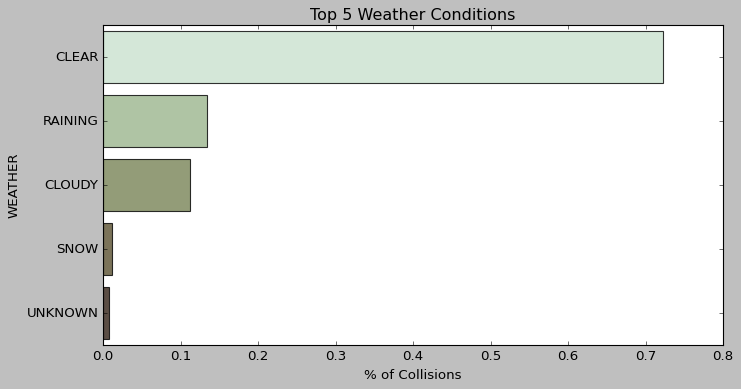

In [ ]:
#graphing top 5 weather conditions
weather = mc_crash1['Weather'].value_counts(normalize=True)
weather = weather[:5,]
plt.figure(figsize=(10,5))
sns.barplot(x=weather.values, y=weather.index, alpha=0.8, palette="ch:.98")
plt.title('Top 5 Weather Conditions')
plt.ylabel('WEATHER', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()

## I want to explore any timelinen trends.  First I need to clean up the timestamp and date column.

In [ ]:
#removing timestamp from 'Crash Date/Time' column 
mc_crash1['Crash Date/Time'] = pd.to_datetime(mc_crash1['Crash Date/Time'], errors='coerce', utc=True).dt.strftime('%Y-%m')

mc_crash1.head()

,Junction,Road Condition,Driver Substance Abuse,Surface Condition,Road Division,Road Grade,Route Type,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Distance Unit,Lane Direction,Distance,Weather,Light,First Harmful Event,Collision Type,Hit/Run,Crash Date/Time,Local Case Number,ACRS Report Type,Agency Name,Location,Number of Lanes,NonTraffic,Longitude,At Fault,Latitude,Report Number
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,OTHER,Single vehicle,No,2019-09,190046316,Property Damage Crash,Montgomery County Police,"(39.0267, -77.136785)",0,Yes,-77.136785,DRIVER,39.026700,MCP3048005T
1,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,PARKED VEHICLE,Straight movement angle,Yes,2020-05,200017938,Property Damage Crash,Gaithersburg Police Depar,"(39.14795617, -77.2296164)",0,Yes,-77.229616,DRIVER,39.147956,EJ78460055
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,OTHER VEHICLE,Straight movement angle,No,2020-09,200036179,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,Yes,-77.202455,DRIVER,39.188862,MCP3245000H
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAYLIGHT,UNITS SEPARATED,NaN,No,2020-10,20002466,Property Damage Crash,Maryland-National Capital,"(39.15869731, -77.14679055)",0,Yes,-77.146791,UNKNOWN,39.158697,HA23890011
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLOUDY,DAYLIGHT,OTHER OBJECT,Single vehicle,No,2020-03,200010527,Property Damage Crash,Montgomery County Police,"(39.1292155, -77.16734233)",0,Yes,-77.167342,DRIVER,39.129216,MCP3090003Z


In [ ]:
#splitting up date column to day month and year
mc_crash1[["year", "month"]] = mc_crash1['Crash Date/Time'].str.split("-", expand = True)
pd.options.mode.chained_assignment = None  # default='warn'
mc_crash1.head()

,Junction,Road Condition,Driver Substance Abuse,Surface Condition,Road Division,Road Grade,Route Type,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Distance Unit,Lane Direction,Distance,Weather,Light,First Harmful Event,Collision Type,Hit/Run,Crash Date/Time,Local Case Number,ACRS Report Type,Agency Name,Location,Number of Lanes,NonTraffic,Longitude,At Fault,Latitude,Report Number,year,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,OTHER,Single vehicle,No,2019-09,190046316,Property Damage Crash,Montgomery County Police,"(39.0267, -77.136785)",0,Yes,-77.136785,DRIVER,39.026700,MCP3048005T,2019,09
1,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,PARKED VEHICLE,Straight movement angle,Yes,2020-05,200017938,Property Damage Crash,Gaithersburg Police Depar,"(39.14795617, -77.2296164)",0,Yes,-77.229616,DRIVER,39.147956,EJ78460055,2020,05
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,OTHER VEHICLE,Straight movement angle,No,2020-09,200036179,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,Yes,-77.202455,DRIVER,39.188862,MCP3245000H,2020,09
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAYLIGHT,UNITS SEPARATED,NaN,No,2020-10,20002466,Property Damage Crash,Maryland-National Capital,"(39.15869731, -77.14679055)",0,Yes,-77.146791,UNKNOWN,39.158697,HA23890011,2020,10
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLOUDY,DAYLIGHT,OTHER OBJECT,Single vehicle,No,2020-03,200010527,Property Damage Crash,Montgomery County Police,"(39.1292155, -77.16734233)",0,Yes,-77.167342,DRIVER,39.129216,MCP3090003Z,2020,03


In [ ]:
# counting crashes by year
mc_crash1.groupby(['year']).count()

,Junction,Road Condition,Driver Substance Abuse,Surface Condition,Road Division,Road Grade,Route Type,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Distance Unit,Lane Direction,Distance,Weather,Light,First Harmful Event,Collision Type,Hit/Run,Crash Date/Time,Local Case Number,ACRS Report Type,Agency Name,Location,Number of Lanes,NonTraffic,Longitude,At Fault,Latitude,Report Number,month
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,8973,9715,9851,9772,9880,9992,10048,10050,10014,10070,10070,10079,10080,10080,10081,10383,10684,11392,11412,11421,11466,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468,11468
2016,9217,10233,10461,10285,10426,10522,10544,10545,10554,10609,10609,10607,10609,10609,10609,11947,11214,11990,12036,12036,12102,12102,12102,12102,12102,12102,12102,12102,12102,12102,12102,12102,12102
2017,8771,10139,10198,10208,10361,10418,10431,10444,10457,10509,10509,10509,10509,10509,10509,10723,10915,12001,12049,12044,12104,12104,12104,12104,12104,12104,12104,12104,12104,12104,12104,12104,12104
2018,8390,9800,9665,10046,10226,10294,10307,10306,10325,10375,10375,10374,10375,10375,10375,10375,10802,11765,11786,11797,11866,11866,11866,11866,11866,11866,11866,11866,11866,11866,11866,11866,11866
2019,8224,9561,9381,9806,9988,10028,10045,10041,10060,10116,10116,10116,10116,10116,10116,10116,10604,11559,11597,11602,11662,11662,11662,11662,11662,11662,11662,11662,11662,11662,11662,11662,11662
2020,5840,6746,6932,6890,6963,7004,6970,6973,7014,7040,7040,7039,7040,7040,7040,7040,7397,8015,8018,8026,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068
2021,5464,6316,6313,6395,6448,6491,6464,6466,6499,6525,6525,6525,6525,6525,6525,6525,6929,7432,7423,7474,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508,7508


In [ ]:
# sorting by year
mc_crash1 = mc_crash1.sort_values("year")
mc_crash1

,Junction,Road Condition,Driver Substance Abuse,Surface Condition,Road Division,Road Grade,Route Type,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Distance Unit,Lane Direction,Distance,Weather,Light,First Harmful Event,Collision Type,Hit/Run,Crash Date/Time,Local Case Number,ACRS Report Type,Agency Name,Location,Number of Lanes,NonTraffic,Longitude,At Fault,Latitude,Report Number,year,month
48742,CROSSOVER RELATED,NO DEFECTS,NaN,WET,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",HILL CREST,County,North,STRAIGHT,North,2.20,WEST SIDE DR,MUDDY BRANCH RD,MILE,East,0.0,RAINING,DARK LIGHTS ON,OTHER VEHICLE,Straight movement angle,Yes,2015-06,15026986,Property Damage Crash,Gaithersburg Police Depar,"(39.12916667, -77.20793333)",2,No,-77.207933,UNKNOWN,39.129167,EJ78180003,2015,06
31178,NON INTERSECTION,NO DEFECTS,ALCOHOL PRESENT,DRY,"TWO-WAY, NOT DIVIDED",LEVEL,County,West,STRAIGHT,West,0.55,GREENLY ST,GOODHILL RD,FEET,North,20.0,CLEAR,DARK LIGHTS ON,PARKED VEHICLE,Head on,Yes,2015-02,15005970,Property Damage Crash,Montgomery County Police,"(39.060995, -77.07177)",2,No,-77.071770,DRIVER,39.060995,MCP2788000F,2015,02
31177,INTERSECTION,NO DEFECTS,NaN,DRY,"TWO-WAY, NOT DIVIDED",LEVEL,Maryland (State),North,STRAIGHT,North,2.88,RIFFLE FORD RD,GERMANTOWN RD,FEET,North,0.0,CLEAR,DARK LIGHTS ON,FIXED OBJECT,Single vehicle,No,2015-04,15015654,Property Damage Crash,Montgomery County Police,"(39.14853667, -77.29017833)",2,No,-77.290178,DRIVER,39.148537,MCP1257000B,2015,04
55525,NON INTERSECTION,NO DEFECTS,UNKNOWN,DRY,"TWO-WAY, NOT DIVIDED",LEVEL,County,South,STRAIGHT,North,0.56,RENN ST,PARKLAND DR,FEET,North,100.0,NaN,DAYLIGHT,OTHER VEHICLE,Same direction sideswipe,Yes,2015-07,15037636,Property Damage Crash,MONTGOMERY,"(39.081515, -77.08700333)",1,No,-77.087003,DRIVER,39.081515,MCP27820011,2015,07
31170,INTERSECTION RELATED,NO DEFECTS,NONE DETECTED,ICE,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",LEVEL,County,South,STRAIGHT,South,0.45,OBSERVATION DR,RIDGE RD,FEET,North,100.0,CLEAR,DAYLIGHT,OTHER VEHICLE,Same direction right turn,No,2015-02,15007601,Property Damage Crash,Montgomery County Police,"(39.20144333, -77.25389)",5,No,-77.253890,DRIVER,39.201443,MCP9106000D,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69731,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,DAYLIGHT,PARKED VEHICLE,NaN,Yes,2021-03,210009236,Property Damage Crash,Montgomery County Police,"(39.15810081, -77.21206156)",0,Yes,-77.212062,DRIVER,39.158101,MCP9399001H,2021,03
69729,INTERSECTION,NO DEFECTS,NONE DETECTED,DRY,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",LEVEL,Municipality,West,STRAIGHT,West,0.33,E JEFFERSON ST,HALPINE RD,FEET,South,0.0,CLEAR,DAYLIGHT,OTHER VEHICLE,Straight movement angle,No,2021-03,210009470,Property Damage Crash,Montgomery County Police,"(39.06012317, -77.12668867)",1,No,-77.126689,DRIVER,39.060123,MCP3221001J,2021,03
69728,INTERSECTION,NO DEFECTS,NONE DETECTED,WET,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",LEVEL,County,North,STRAIGHT,North,0.46,WESTLAKE TERR,WESTLAKE DR,FEET,East,0.0,RAINING,DAYLIGHT,OTHER VEHICLE,Straight movement angle,No,2021-03,210010111,Injury Crash,Montgomery County Police,"(39.02726167, -77.14773)",2,No,-77.147730,DRIVER,39.027262,MCP3045003S,2021,03
69741,NaN,NaN,NONE DETECTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLEAR,UNKNOWN,PARKED VEHICLE,Unknown,Yes,2021-03,210008840,Property Damage Crash,Montgomery County Police,"(38.99607333, -77.03673333)",0,Yes,-77.036733,DRIVER,38.996073,MCP30260064,2021,03


In [ ]:
# quick check to see if all instances are included 
year = mc_crash1['year'].value_counts(ascending=True)
year

2021     7508
2020     8068
2015    11468
2019    11662
2018    11866
2016    12102
2017    12104
Name: year, dtype: int64

In [ ]:
#confirming all instances are there by manually adding value counts
b = 12104 + 12102 + 11866 + 11662 + 11468 + 8068 + 7508
b

74778

In [ ]:
##sorting by year
year = year.sort_index()
year

2015    11468
2016    12102
2017    12104
2018    11866
2019    11662
2020     8068
2021     7508
Name: year, dtype: int64

<function matplotlib.pyplot.show>

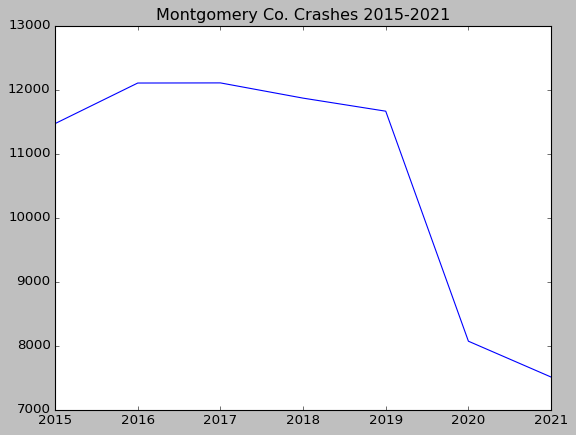

In [ ]:
sns.lineplot(y=year.values, x=year.index, data=year, sort=False)
plt.title('Montgomery Co. Crashes 2015-2021')
plt.show


In [ ]:
mo_type = mc_crash1[["ACRS Report Type",'year', 'month', 'Report Number']]
mo_type = mo_type.loc[(mo_type['year'] == '2019')]
mo_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11662 entries, 60216 to 45346
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACRS Report Type  11662 non-null  object
 1   year              11662 non-null  object
 2   month             11662 non-null  object
 3   Report Number     11662 non-null  object
dtypes: object(4)
memory usage: 455.5+ KB


In [ ]:
yr_coltype = mc_crash1[["ACRS Report Type",'year', 'Report Number']]
#.groupby(["ACRS Report Type",'year']).value_counts()
yr_coltype

#Airports[['Dom_Pax_in','Dom_Pax_Out', 'Year_Ended_December']].groupby(['Year_Ended_December']).sum()
#df.groupby(['Year'])['Global_Sales'].sum().plot()

,ACRS Report Type,year,Report Number
48742,Property Damage Crash,2015,EJ78180003
31178,Property Damage Crash,2015,MCP2788000F
31177,Property Damage Crash,2015,MCP1257000B
55525,Property Damage Crash,2015,MCP27820011
31170,Property Damage Crash,2015,MCP9106000D
...,...,...,...
69731,Property Damage Crash,2021,MCP9399001H
69729,Property Damage Crash,2021,MCP3221001J
69728,Injury Crash,2021,MCP3045003S
69741,Property Damage Crash,2021,MCP30260064


In [ ]:
#grouping by year, report type, and counting number of each type
yr_coltype_count = yr_coltype.groupby(['year', 'ACRS Report Type'])['Report Number'].count()
yr_coltype_count = pd.DataFrame(yr_coltype_count)

In [ ]:
yr_coltype_count

Report Number
year ACRS Report Type                    
2015 Fatal Crash                       34
     Injury Crash                    4159
     Property Damage Crash           7275
2016 Fatal Crash                       29
     Injury Crash                    4424
     Property Damage Crash           7649
2017 Fatal Crash                       26
     Injury Crash                    4315
     Property Damage Crash           7763
2018 Fatal Crash                       29
     Injury Crash                    4208
     Property Damage Crash           7629
2019 Fatal Crash                       32
     Injury Crash                    4030
     Property Damage Crash           7600
2020 Fatal Crash                       40
     Injury Crash                    2658
     Property Damage Crash           5370
2021 Fatal Crash                       25
     Injury Crash                    2431
     Property Damage Crash           5052

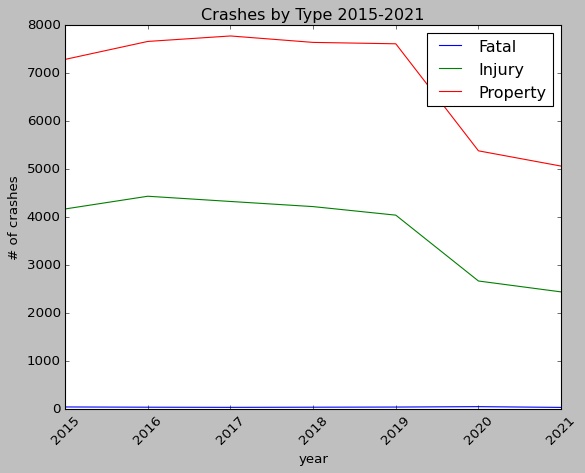

In [ ]:
yr_coltype_count.unstack().plot(legend=True)
plt.xticks(rotation=45)
plt.title('Crashes by Type 2015-2021')
plt.ylabel('# of crashes')
plt.legend(['Fatal', 'Injury', 'Property'], loc='upper right')
plt.show()

In [ ]:
## major reduction in 2019.  
yr_2016 = yr_coltype_count.loc['2018':'2021']

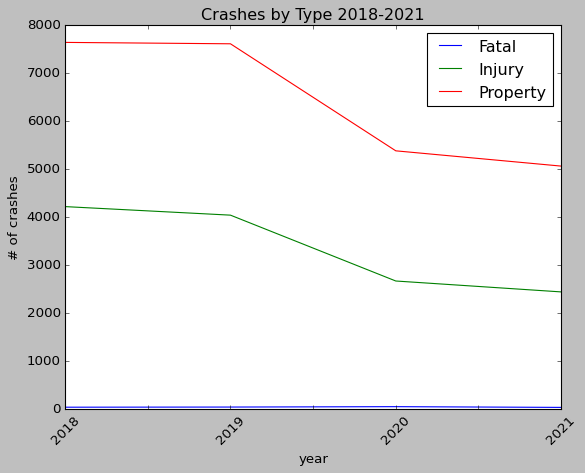

In [ ]:
yr_2016.unstack().plot(legend=True)
plt.xticks(rotation=45)
plt.title('Crashes by Type 2018-2021')
plt.ylabel('# of crashes')
plt.legend(['Fatal', 'Injury', 'Property'], loc='upper right')
plt.show()

In [ ]:
mo_type_count = mo_type.groupby(['month', 'ACRS Report Type'])['Report Number'].count()
mo_type_count = pd.DataFrame(mo_type_count)
mo_type_count

Report Number
month ACRS Report Type                    
01    Fatal Crash                        2
      Injury Crash                     303
      Property Damage Crash            629
02    Fatal Crash                        2
      Injury Crash                     291
      Property Damage Crash            534
03    Fatal Crash                        5
      Injury Crash                     314
      Property Damage Crash            619
04    Fatal Crash                        1
      Injury Crash                     314
      Property Damage Crash            622
05    Fatal Crash                        2
      Injury Crash                     367
      Property Damage Crash            698
06    Fatal Crash                        1
      Injury Crash                     354
      Property Damage Crash            609
07    Fatal Crash                        3
      Injury Crash                     340
      Property Damage Crash            626
08    Fatal Crash                        4
      Injury Crash                     319
      Property Damage Crash            554
09    Fatal Crash                        4
      Injury Crash                     332
      Property Damage Crash            637
10    Fatal Crash                        4
      Injury Crash                     397
      Property Damage Crash            720
11    Fatal Crash                        2
      Injury Crash                     341
      Property Damage Crash            662
12    Fatal Crash                        2
      Injury Crash                     358
      Property Damage Crash            690

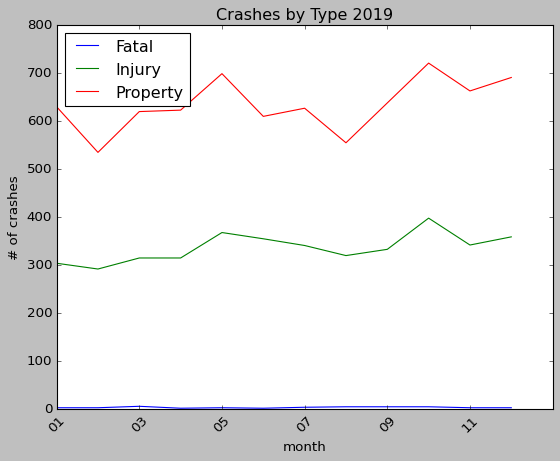

In [ ]:
mo_type_count.unstack().plot(legend=True)
plt.xticks(rotation=45)
plt.title('Crashes by Type 2019')
plt.ylabel('# of crashes')
plt.legend(['Fatal', 'Injury', 'Property'], loc='upper left')
plt.show()

In [ ]:
#making map
mc_crash_clean

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,"IN FRONT OF 6630 EAMES WAY BETHESDA, MD.",NaN,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER,NaN,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,EJ78460055,200017938,Gaithersburg Police Depar,Property Damage Crash,05/02/2020 02:16:00 PM,Yes,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,949 CLOPPER RD PARKING LOT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,PARKED VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,09/15/2020 03:33:00 PM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT @ 9827 BROOKRIDGE CT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,OTHER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.188862,-77.202455,"(39.18886167, -77.202455)"
3,HA23890011,20002466,Maryland-National Capital,Property Damage Crash,10/14/2020 08:40:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,GRAVEL PARKING LOT AT POPE FARM NURSERY,NaN,NaN,UNKNOWN,NaN,NaN,NaN,DAYLIGHT,NaN,NaN,NaN,UNITS SEPARATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,03/03/2020 09:19:00 AM,No,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT OF 16705 CRABBS BRANCH WAY,NaN,NaN,DRIVER,SINGLE VEHICLE,CLOUDY,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER OBJECT,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,39.129216,-77.167342,"(39.1292155, -77.16734233)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74773,MCP3298000L,210036860,Montgomery County Police,Injury Crash,09/18/2021 04:51:00 PM,Yes,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT ENTRENCE/EXIT OF 619 N FREDERICK AVE.,NaN,PEDESTRIAN,DRIVER,OTHER,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NONE DETECTED,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.128688,-77.185570,"(39.12868842, -77.18557007)"
74774,MCP3288001D,210037285,Montgomery County Police,Injury Crash,09/21/2021 12:30:00 PM,No,Municipality,1.54,North,South,2,NaN,2,North,0.0,FEET,LEVEL,No,RUSSELL AVE,Municipality,CHRISTOPHER AVE,NaN,GAITHERSBURG,NaN,UNKNOWN,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,OTHER VEHICLE,OTHER VEHICLE,NaN,INTERSECTION,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.157540,-77.213765,"(39.15754, -77.213765)"
74775,MCP13870002,210037317,Montgomery County Police,Injury Crash,09/21/2021 03:45:00 PM,No,Interstate (State),10.04,North,North,0,CROSSOVER AREA,8,North,25.0,FEET,HILL UPHILL,No,EISENHOWER MEMORIAL HWY,Unknown,SPUR FR C/D LANE (NB/L),NaN,NaN,NaN,DRIVER,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,NaN,NONE DETECTED,NaN,OTHER OBJECT,NaN,CRASH ATTENUATOR,CROSSOVER RELATED,OTHER,THRU ROADWAY,STRAIGHT,NO DEFECTS,ONE-WAY TRAFFICWAY,39.042840,-77.052845,"(39.04284, -77.052845)"
74776,DD56310043,210036917,Rockville Police Departme,Property Damage Crash,09/19/2021 02:09:00 AM,Yes,Maryland (State),1

In [ ]:
map = mc_crash_clean[["Latitude","Longitude", "ACRS Report Type"]]

In [ ]:
loc_map = folium.Map(location=[map.Latitude.mean(), map.Longitude.mean()], zoom_start=14,control_scale=True)
loc_map

In [ ]:
for index, location_info in map.iterrows():
  folium.Marker([location_info["Latitude"], location_info["Longitude"]],popup=location_info["ACRS Report Type"]).add_to(loc_map)
plt.show()

In [ ]:
loc_map